<a href="https://colab.research.google.com/github/andy311p/Udemy_advanced_NLP/blob/master/NLP_BiLSTM_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports and HyperParameters
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input,LSTM,GRU,Bidirectional,GlobalMaxPooling1D,Lambda,Concatenate,Dense
import keras.backend as K
from keras.models import Model

MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28,28) / 255.0

In [ ]:
D = 28
M = 15

#input dimensions 28*28
input_ = Input(shape=(D,D))

#up_down
rnn1 = Bidirectional(LSTM(M,return_sequences=True))
x1 = rnn1(input_)#output N*D*2M
x1 = GlobalMaxPooling1D()(x1)#N*2M

#left_right
#custom layer that transposes the image
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0,2,1)))
rnn2 = Bidirectional(LSTM(M,return_sequences=True))
x2 = permutor(input_)
x2 = rnn2(x2)
x2 = GlobalMaxPooling1D()(x2)#N*2M

#put the two directions together
concatenator = Concatenate(axis=1)
x = concatenator([x1,x2])#N*4M

#final Dense layer
output = Dense(10,activation='softmax')(x)

model = Model(input_, output)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
print("Training time.....")
res = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.3
)

Training time.....
Epoch 1/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.6583 - accuracy: 0.8380 - val_loss: 0.2648 - val_accuracy: 0.9261
Epoch 2/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.2128 - accuracy: 0.9398 - val_loss: 0.1830 - val_accuracy: 0.9464
Epoch 3/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.1546 - accuracy: 0.9556 - val_loss: 0.1388 - val_accuracy: 0.9583
Epoch 4/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.1233 - accuracy: 0.9642 - val_loss: 0.1403 - val_accuracy: 0.9573
Epoch 5/5
1313/1313 [==============================] - 41s 32ms/step - loss: 0.1073 - accuracy: 0.9688 - val_loss: 0.1101 - val_accuracy: 0.9667


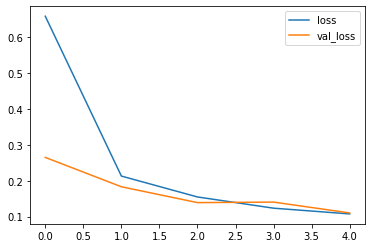

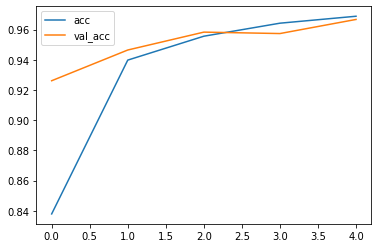

In [ ]:
# plot some data
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(res.history['accuracy'], label='acc')
plt.plot(res.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# # plot the mean AUC over each label
# p = model.predict(data)
# aucs = []
# for j in range(6):
#     auc = roc_auc_score(targets[:,j], p[:,j])
#     aucs.append(auc)
# print(np.mean(aucs))

[[[-0.5801525   0.06808588 -0.04721453]
  [ 0.32034228 -0.62727557 -2.44219065]
  [ 0.23404343  1.38661925  0.07614053]]

 [[ 0.83267963  0.19208428  1.02801091]
  [-0.88827598 -1.47248712 -0.57494242]
  [ 0.11928063 -0.08006667 -2.4718639 ]]

 [[-0.04368834 -0.26788151  0.65371636]
  [ 1.62533369  0.80078791  0.06781377]
  [ 1.03668321  0.50337205 -1.04663385]]]
